In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from datasets import load_dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, log_loss
import joblib

In [4]:
dataset = load_dataset("legacy107/spamming-email-classification")

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Text', 'Spam'],
        num_rows: 4556
    })
    val: Dataset({
        features: ['Text', 'Spam'],
        num_rows: 569
    })
    test: Dataset({
        features: ['Text', 'Spam'],
        num_rows: 570
    })
})

In [6]:
train_data = dataset['train'].to_pandas()
test_data = dataset['test'].to_pandas()
val_data = dataset['val'].to_pandas()

In [8]:
X_train, y_train = train_data['Text'], train_data['Spam']
X_val, y_val = val_data['Text'], val_data['Spam']
X_test, y_test = test_data['Text'], test_data['Spam']

In [9]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [18]:
# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [22]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=100),
    "SVM": SVC(probability=True),  # probability=True is needed to calculate log loss
    "Naive Bayes": MultinomialNB()
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities (needed for log loss)
    val_probs = model.predict_proba(X_val)
    test_probs = model.predict_proba(X_test)

    # Predict classes
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    # Calculate log loss
    val_loss = log_loss(y_val, val_probs)
    test_loss = log_loss(y_test, test_probs)

    # Evaluate the model
    val_accuracy = accuracy_score(y_val, val_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    results[name] = {
        "Validation Accuracy": val_accuracy,
        "Test Accuracy": test_accuracy,
        "Validation Loss": val_loss,
        "Test Loss": test_loss
    }

    print(f"Results for {name}:")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Validation Loss: {val_loss}")
    print(f"Test Loss: {test_loss}")
    print("Classification Report on Test Data:")
    print(classification_report(y_test, test_preds))
    print("\n")

    # Save the model
    joblib.dump(model, f'{name}_model.joblib')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

Results for Logistic Regression:
Validation Accuracy: 0.9718804920913884
Test Accuracy: 0.9824561403508771
Validation Loss: 0.1257930049860036
Test Loss: 0.11487750007565548
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       433
           1       0.99      0.93      0.96       137

    accuracy                           0.98       570
   macro avg       0.99      0.97      0.98       570
weighted avg       0.98      0.98      0.98       570



Results for SVM:
Validation Accuracy: 0.984182776801406
Test Accuracy: 0.9929824561403509
Validation Loss: 0.01718154101796219
Test Loss: 0.020433059323735674
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       433
           1       0.99      0.98      0.99       137

    accuracy                           0.99       570
   macro avg       0.99      0.99      0.99     

['tfidf_vectorizer.joblib']

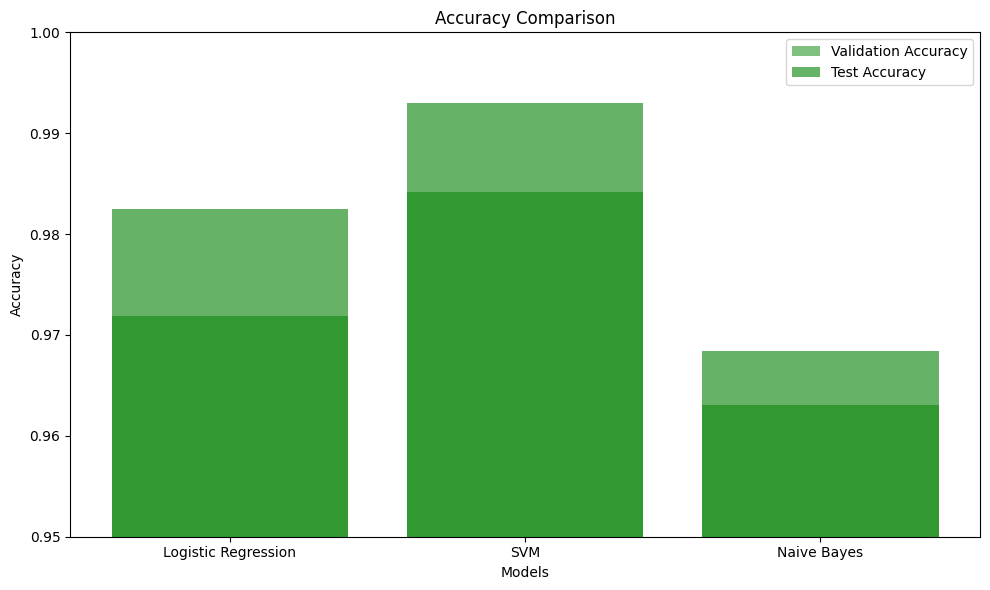

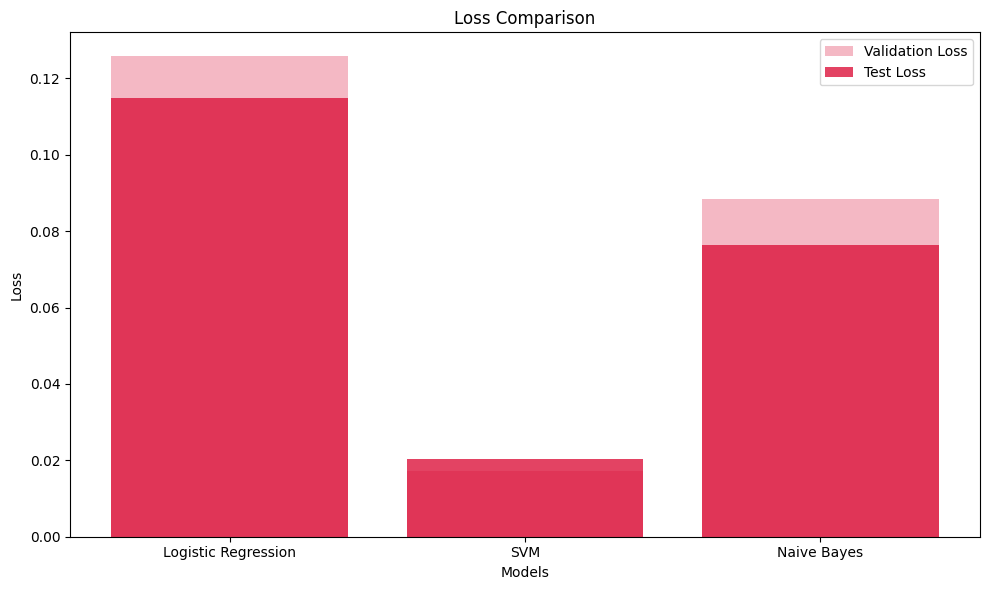

In [49]:
import matplotlib.pyplot as plt

# Define data for plotting
models = ["Logistic Regression", "SVM", "Naive Bayes"]
validation_accuracy = [0.9718804920913884, 0.984182776801406, 0.9630931458699473]
test_accuracy = [0.9824561403508771, 0.9929824561403509, 0.968421052631579]
validation_loss = [0.1257930049860036, 0.01718154101796219, 0.08843430974039357]
test_loss = [0.11487750007565548, 0.020433059323735674, 0.07627884732464599]

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, validation_accuracy, label='Validation Accuracy', color='g', alpha=0.5)
plt.bar(models, test_accuracy, label='Test Accuracy', color='g', alpha=0.6)
plt.ylim([0.95, 1.0])
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.bar(models, validation_loss, label='Validation Loss', color='crimson', alpha=0.3)
plt.bar(models, test_loss, label='Test Loss', color='crimson', alpha=0.8)
plt.title('Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

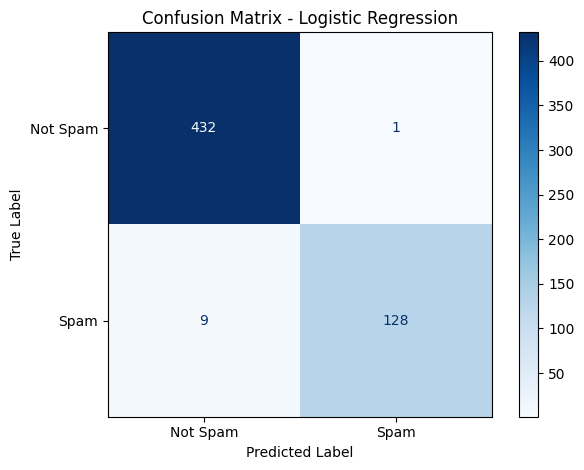

<Figure size 2000x2000 with 0 Axes>

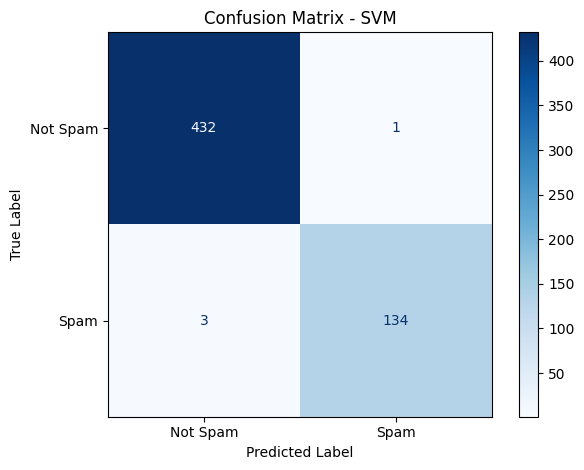

<Figure size 2000x2000 with 0 Axes>

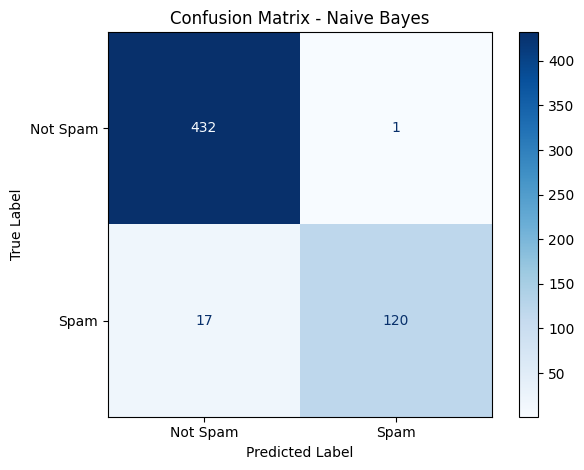

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
models = ["Logistic Regression", "SVM", "Naive Bayes"]

model_lr = joblib.load('Logistic Regression_model.joblib')
model_svm = joblib.load('SVM_model.joblib')
model_nb = joblib.load('Naive Bayes_model.joblib')

for model_name, model in zip(models, [model_lr, model_svm, model_nb]):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
    plt.figure(figsize=(20, 20))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

In [28]:
model_lr = joblib.load('Logistic Regression_model.joblib')
model_svm = joblib.load('SVM_model.joblib')
model_nb = joblib.load('Naive Bayes_model.joblib')

preds_lr = model_lr.predict(X_test)
preds_svm = model_svm.predict(X_test)
preds_nb = model_nb.predict(X_test)


print("Sample predictions and true labels:")
print("Logistic Regression:")
print(f"Predictions: {preds_lr[:10]}")
print(f"True Labels: {y_test[:10]}")

cm_lr = confusion_matrix(y_test, preds_lr)
print("Confusion Matrix - Logistic Regression:")
print(cm_lr)


Sample predictions and true labels:
Logistic Regression:
Predictions: [0 0 1 1 1 0 0 0 1 0]
True Labels: [0 0 1 1 1 0 0 0 1 0]
Confusion Matrix - Logistic Regression:
[[432   1]
 [  9 128]]
